# dataset link

https://www.kaggle.com/datasets/kaggle/sf-salaries

In [119]:
import sqlite3
from pandasql import sqldf

### Build SQl Connection

In [99]:
import pandas as pd

df = pd.read_csv("Data/Salaries.csv")
df.columns

C:\Users\Salwa\AppData\Local\Temp\ipykernel_3932\3408671428.py:3: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Data/Salaries.csv")


Index(['Id', 'EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay',
       'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Notes', 'Agency',
       'Status'],
      dtype='object')

In [100]:
df.shape

(148654, 13)

### PreProcess - Cleaning

In [101]:
df.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

In [102]:
df.drop(columns = ["Status","Notes"],axis=1,inplace=True)

In [103]:
df.dropna(subset=["Benefits","BasePay"],inplace=True)

In [104]:
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
36159,36160,Gary Altenberg,"Lieutenant, Fire Suppression",128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012,San Francisco
36160,36161,Gregory Suhr,Chief of Police,302578.0,0.0,18974.11,69810.19,321552.11,391362.30,2012,San Francisco
36161,36162,Khoa Trinh,Electronic Maintenance Tech,111921.0,146415.32,78057.41,53102.29,336393.73,389496.02,2012,San Francisco
36162,36163,Joanne Hayes-White,"Chief, Fire Department",296943.01,0.0,17816.59,72047.88,314759.60,386807.48,2012,San Francisco
36163,36164,Frederick Binkley,EMT/Paramedic/Firefighter,126863.19,192424.49,17917.18,44438.25,337204.86,381643.11,2012,San Francisco


### PreProcess - Dtypes

In [105]:
# convert the pay columns to numeric
for column in ['BasePay', 'OvertimePay', 'OtherPay', 'Benefits']:
    df[column] = pd.to_numeric(df[column], errors='coerce')

In [202]:
## Adding Status Column
import random
choices = ["Full-Time","Part-Time","Freelance"]
result = [random.choice(choices) for _ in range(len(df))]
df['Status'] = result


In [132]:
df.drop(columns=['index','Id'],inplace=True)

### Saving Cleaned CSV

In [141]:
df.reset_index(names='Id').to_csv("salary.csv",index=False)

# Q1:  What is the average BasePay across all job titles?

# PYTHON CODE

In [57]:
average_basepay = df.BasePay.mean()
average_basepay

67207.55842464653

# sql code

In [160]:
sqldf("""
      select avg(basepay) as AvgPay
      from df
""",globals())

,AvgPay
0,67207.558425


# Q2: Which job title has the highest BasePay?


# PYTHON CODE

In [158]:
highest_basepay_job = df.loc[df['BasePay'].argmax(),['JobTitle','BasePay']]
highest_basepay_job

JobTitle    Chief of Police
BasePay           319275.01
Name: 36766, dtype: object

# sql code

In [165]:
sqldf("""
      select jobtitle , max(basepay) as maxpay
      from df
      group by jobtitle 
      order by maxpay desc
      limit 1
""",globals())

,JobTitle,maxpay
0,Chief of Police,319275.01


# Q3: How many unique job titles are there in the dataset?


# PYTHON CODE

In [172]:
unique_job_title = df['JobTitle'].nunique()
unique_job_title

1110

# sql code

In [173]:
sqldf("""
      select count(distinct jobtitle) as unique_jobtitle
      from df
""",globals())

,unique_jobtitle
0,1110


#### Q4: What is the total OvertimePay for each year?


# PYTHON CODE

In [174]:
Total_Overtime_ByYear = df.groupby('Year')['OvertimePay'].sum()
Total_Overtime_ByYear

Year
2012    1.846910e+08
2013    1.986182e+08
2014    2.059186e+08
Name: OvertimePay, dtype: float64

# sql code

In [175]:
sqldf("""
      select year , sum(overtimepay) as total_overtime
      from df
      group by year
""",globals())

,Year,total_overtime
0,2012,1.846910e+08
1,2013,1.986182e+08
2,2014,2.059186e+08


#### Q5: Which year had the highest average OtherPay?


# PYTHON CODE

In [189]:
Year_High_Avg_OtherPay = df.groupby(['Year'])['OtherPay'].mean().sort_values(ascending=False).index[0]
Year_High_Avg_OtherPay

2013

# sql code

In [178]:
sqldf("""
      select year , avg(otherpay) as MaxAvgPay
      from df
      group by year 
      order by MaxAvgPay desc
      limit 1
""",globals())

,Year,MaxAvgPay
0,2013,3810.341313


#### Q6: What is the median TotalPay for each job title?


# PYTHON CODE

In [190]:
Median_TotalPay_EachJob = df.groupby('JobTitle')['TotalPay'].median()
Median_TotalPay_EachJob

JobTitle
ACPO,JuvP, Juv Prob (SFERS)        62290.780
ASR Senior Office Specialist       65824.065
ASR-Office Assistant               46930.610
Account Clerk                      52891.030
Accountant I                       67403.330
                                     ...    
Wire Rope Cable Maint Sprv        193691.790
Worker's Comp Supervisor 1         92558.110
Worker's Compensation Adjuster     80348.540
X-Ray Laboratory Aide              60047.290
Youth Comm Advisor                 44449.895
Name: TotalPay, Length: 1110, dtype: float64

# sql code

In [196]:
# sqldf("""
#       SELECT JobTitle, PERCENTILE_CONT(0.5) WITHIN GROUP (ORDER BY TotalPay) 
#        OVER (PARTITION BY JobTitle) AS Median_TotalPay_EachJob 
#        FROM df;
# """,globals())

#### Q7: How many employees are there in each agency?


# PYTHON CODE

In [203]:
df.head()

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency,Status
0,Gary Altenberg,"Lieutenant, Fire Suppression",128808.87,220909.48,13126.31,44430.12,362844.66,407274.78,2012,San Francisco,Freelance
1,Gregory Suhr,Chief of Police,302578.00,0.00,18974.11,69810.19,321552.11,391362.30,2012,San Francisco,Freelance
2,Khoa Trinh,Electronic Maintenance Tech,111921.00,146415.32,78057.41,53102.29,336393.73,389496.02,2012,San Francisco,Part-Time
3,Joanne Hayes-White,"Chief, Fire Department",296943.01,0.00,17816.59,72047.88,314759.60,386807.48,2012,San Francisco,Part-Time
4,Frederick Binkley,EMT/Paramedic/Firefighter,126863.19,192424.49,17917.18,44438.25,337204.86,381643.11,2012,San Francisco,Freelance


In [205]:
Nemp_Per_Agency = df.groupby("Agency")['EmployeeName'].count()
Nemp_Per_Agency

Agency
San Francisco    111890
Name: EmployeeName, dtype: int64

# sql code

In [210]:
sqldf('''
    select agency , count(EmployeeName)
    from df
    group by agency
''',globals())

,Agency,count(EmployeeName)
0,San Francisco,111890


#### Q8: What is the maximum Benefits offered by any agency?


# PYTHON CODE

In [219]:
Max_Benefit_By_Agency = df.groupby('Agency')['Benefits'].max().iloc[0]
Max_Benefit_By_Agency

96570.66

# sql code

In [220]:
sqldf("""
      select agency , max(benefits) as max_benefit
      from df 
      group by agency
      order by max_benefit desc
      limit 1
""",globals())

,Agency,max_benefit
0,San Francisco,96570.66


#### Q9: What is the total BasePay, OvertimePay, and OtherPay for each employee?


# PYTHON CODE

In [241]:
df[['EmployeeName', 'TotalCompensation']].groupby('EmployeeName').sum()

,TotalCompensation
EmployeeName,
A Bernard Fatooh,23923.62
A Bernard Fatooh,42561.54
A K Finizio,25854.81
A. James Robertson Ii,22601.80
A. James Robertson Ii,22065.71
...,...
Zun Jin Zhang He,115640.74
Zuna Luu,52518.08
Zuna T Luu,112243.35


# sql code

In [242]:
sqldf("""
      select employeename , sum(basepay+overtimepay+otherpay) as total_consumtion
      from df 
      group by employeename
      
""",globals())

,EmployeeName,total_consumtion
0,A Bernard Fatooh,23923.62
1,A Bernard Fatooh,42561.54
2,A K Finizio,25854.81
3,A. James Robertson Ii,22601.80
4,A. James Robertson Ii,22065.71
...,...,...
76433,Zun Jin Zhang He,115640.74
76434,Zuna Luu,52518.08
76435,Zuna T Luu,112243.35
76436,Zuri Jones,71986.90


#### Q10: Which employee has the highest TotalPayBenefits?


# PYTHON CODE

In [243]:
df.loc[df['TotalPayBenefits'].argmax(),'EmployeeName']

'David Shinn'

# sql code

In [244]:
sqldf("""
    select employeename 
    from df
    where totalpaybenefits = (select max(totalpaybenefits) from df)
""",globals())

,EmployeeName
0,David Shinn


#### Q11: How does the average TotalPayBenefits vary across years?


# PYTHON CODE

In [246]:
df[['Year','TotalPayBenefits']].groupby('Year').mean()

,TotalPayBenefits
Year,
2012,100553.229232
2013,102939.981346
2014,100250.918884


In [247]:
df.groupby('Year')['TotalPayBenefits'].mean()

Year
2012    100553.229232
2013    102939.981346
2014    100250.918884
Name: TotalPayBenefits, dtype: float64

# sql code

In [248]:
sqldf("""
    select year , avg(totalpaybenefits) as avg_tot_benefits
    from df
    group by year
""",globals())

,Year,avg_tot_benefits
0,2012,100553.229232
1,2013,102939.981346
2,2014,100250.918884


#### Q12: What is the total BasePay for each status (full-time, part-time, etc.)?


# PYTHON CODE

In [249]:
df.groupby('Status')['BasePay'].sum()

Status
Freelance    2.515832e+09
Full-Time    2.496570e+09
Part-Time    2.507183e+09
Name: BasePay, dtype: float64

# sql code

In [251]:
sqldf("""
    select status , sum(basepay) as total_basepay
    from df
    group by status
""",globals())

,Status,total_basepay
0,Freelance,2.515832e+09
1,Full-Time,2.496570e+09
2,Part-Time,2.507183e+09


#### Q13: How many employees are there for each job title in each agency?


# PYTHON CODE

In [255]:
df.groupby(['JobTitle','Agency'])['EmployeeName'].count().sort_values(ascending = False)

JobTitle                        Agency       
Transit Operator                San Francisco    6975
Special Nurse                   San Francisco    4382
Registered Nurse                San Francisco    3725
Public Svc Aide-Public Works    San Francisco    2514
Police Officer 3                San Francisco    2411
                                                 ... 
Cashier 3                       San Francisco       1
Pianist                         San Francisco       1
Police Services Aide            San Francisco       1
Auto Body&Fender Wrk Asst Sprv  San Francisco       1
ACPO,JuvP, Juv Prob (SFERS)     San Francisco       1
Name: EmployeeName, Length: 1110, dtype: int64

# sql code

In [254]:
sqldf("""
    select agency , jobtitle , count(employeename) as N_emps 
    from df
    group by agency , jobtitle 
    order by N_emps desc
""",globals())

,Agency,JobTitle,N_emps
0,San Francisco,Transit Operator,6975
1,San Francisco,Special Nurse,4382
2,San Francisco,Registered Nurse,3725
3,San Francisco,Public Svc Aide-Public Works,2514
4,San Francisco,Police Officer 3,2411
...,...,...,...
1105,San Francisco,Special Assistant 8,1
1106,San Francisco,"Sr Cnselor, Juv Hall (SFERS)",1
1107,San Francisco,"Sr Sprv Prob Ofc, Juv Prob",1
1108,San Francisco,"Supervising Mediator, UFCS",1


#### Q14: Which job title has the highest average Benefits?


# PYTHON CODE

In [273]:
df.groupby('JobTitle')['Benefits'].mean().nlargest(1)

JobTitle
Chief Investment Officer    96570.66
Name: Benefits, dtype: float64

# sql code

In [265]:
sqldf("""
    select jobtitle , avg(benefits) as avg_benefits 
    from df
    group by jobtitle 
    order by avg_benefits desc
    limit 1 
""",globals())

,JobTitle,avg_benefits
0,Chief Investment Officer,96570.66


#### Q15: What is the ratio of BasePay to TotalPayBenefits for each job title?


# PYTHON CODE

In [274]:
# Calculate the ratio and group by JobTitle
df['Ratio'] = df['BasePay'] / df['TotalPayBenefits']
ratio_by_job_title = df.groupby('JobTitle')['Ratio'].mean().reset_index()

In [275]:
ratio_by_job_title

,JobTitle,Ratio
0,"ACPO,JuvP, Juv Prob (SFERS)",0.776051
1,ASR Senior Office Specialist,0.676322
2,ASR-Office Assistant,0.686909
3,Account Clerk,0.674755
4,Accountant I,0.701642
...,...,...
1105,Wire Rope Cable Maint Sprv,0.386100
1106,Worker's Comp Supervisor 1,0.658600
1107,Worker's Compensation Adjuster,0.716513
1108,X-Ray Laboratory Aide,0.726610


# sql code

In [276]:
sqldf("""
    select jobtitle , avg(basepay / totalpaybenefits) as avg_benefits 
    from df
    group by jobtitle 
""",globals())

,JobTitle,avg_benefits
0,"ACPO,JuvP, Juv Prob (SFERS)",0.776051
1,ASR Senior Office Specialist,0.676322
2,ASR-Office Assistant,0.686909
3,Account Clerk,0.674755
4,Accountant I,0.701642
...,...,...
1105,Wire Rope Cable Maint Sprv,0.386100
1106,Worker's Comp Supervisor 1,0.658600
1107,Worker's Compensation Adjuster,0.716513
1108,X-Ray Laboratory Aide,0.726610


#### Q16: Which job title has the highest ratio of BasePay to TotalPayBenefits?


# PYTHON CODE

In [289]:
ratio_by_job_title.loc[ratio_by_job_title['Ratio'].max() == ratio_by_job_title['Ratio'] , ['JobTitle','Ratio']]

,JobTitle,Ratio
953,"Sr Cnselor, Juv Hall (SFERS)",0.99746


# sql code

In [290]:
sqldf("""
    select jobtitle , avg(basepay / totalpaybenefits) as Ratio 
    from df
    group by jobtitle 
    order by Ratio desc 
    limit 1
""",globals())

,JobTitle,Ratio
0,"Sr Cnselor, Juv Hall (SFERS)",0.99746


#### Q17: How many years of data are available in the dataset?


# PYTHON CODE

In [291]:
df['Year'].nunique()

3

# sql code

In [292]:
sqldf("""
    select count(distinct year) as N_Year
    from df
""",globals())

,N_Year
0,3


#### Q18: What is the average BasePay for each year and job title combination?


# PYTHON CODE

In [294]:
df.groupby(['JobTitle','Year'])['BasePay'].mean()

JobTitle                      Year
ACPO,JuvP, Juv Prob (SFERS)   2014    62290.780000
ASR Senior Office Specialist  2012    58844.878235
                              2013    64617.594762
                              2014    57989.199545
ASR-Office Assistant          2012    40580.289091
                                          ...     
X-Ray Laboratory Aide         2013    44876.745882
                              2014    45490.340286
Youth Comm Advisor            2012    57544.730000
                              2013    33174.840000
                              2014    32417.420000
Name: BasePay, Length: 3082, dtype: float64

# sql code

In [295]:
sqldf("""
    select jobtitle , year , avg(basepay) as avg_basepay 
    from df
    group by jobtitle , year 
""",globals())

,JobTitle,Year,avg_basepay
0,"ACPO,JuvP, Juv Prob (SFERS)",2014,62290.780000
1,ASR Senior Office Specialist,2012,58844.878235
2,ASR Senior Office Specialist,2013,64617.594762
3,ASR Senior Office Specialist,2014,57989.199545
4,ASR-Office Assistant,2012,40580.289091
...,...,...,...
3077,X-Ray Laboratory Aide,2013,44876.745882
3078,X-Ray Laboratory Aide,2014,45490.340286
3079,Youth Comm Advisor,2012,57544.730000
3080,Youth Comm Advisor,2013,33174.840000


#### Q19: How many employees have a TotalPayBenefits greater than $326373.19??


# PYTHON CODE

In [296]:
df.loc[df['TotalPayBenefits'] > 326373.19 , 'EmployeeName'].count()

140

# sql code

In [297]:
sqldf("""
    select count(employeename) as N_Employees 
    from df
    where totalpaybenefits > 326373.19
""",globals())

,N_Employees
0,140


#### Q20: Which agency has the highest average TotalPayBenefits?


# PYTHON CODE

In [299]:
df.groupby('Agency')['TotalPayBenefits'].mean().nlargest(1)

Agency
San Francisco    101239.503587
Name: TotalPayBenefits, dtype: float64

# sql code

In [ ]:
sqldf("""
    select Agency , avg(totalpaybenefits) as avg_tot_benefits
    from df
    group by agency
    order by avg_tot_benefits desc
    limit 1
""",globals())

## EXCEL DASHBOARD

### Salaries Dashboard 

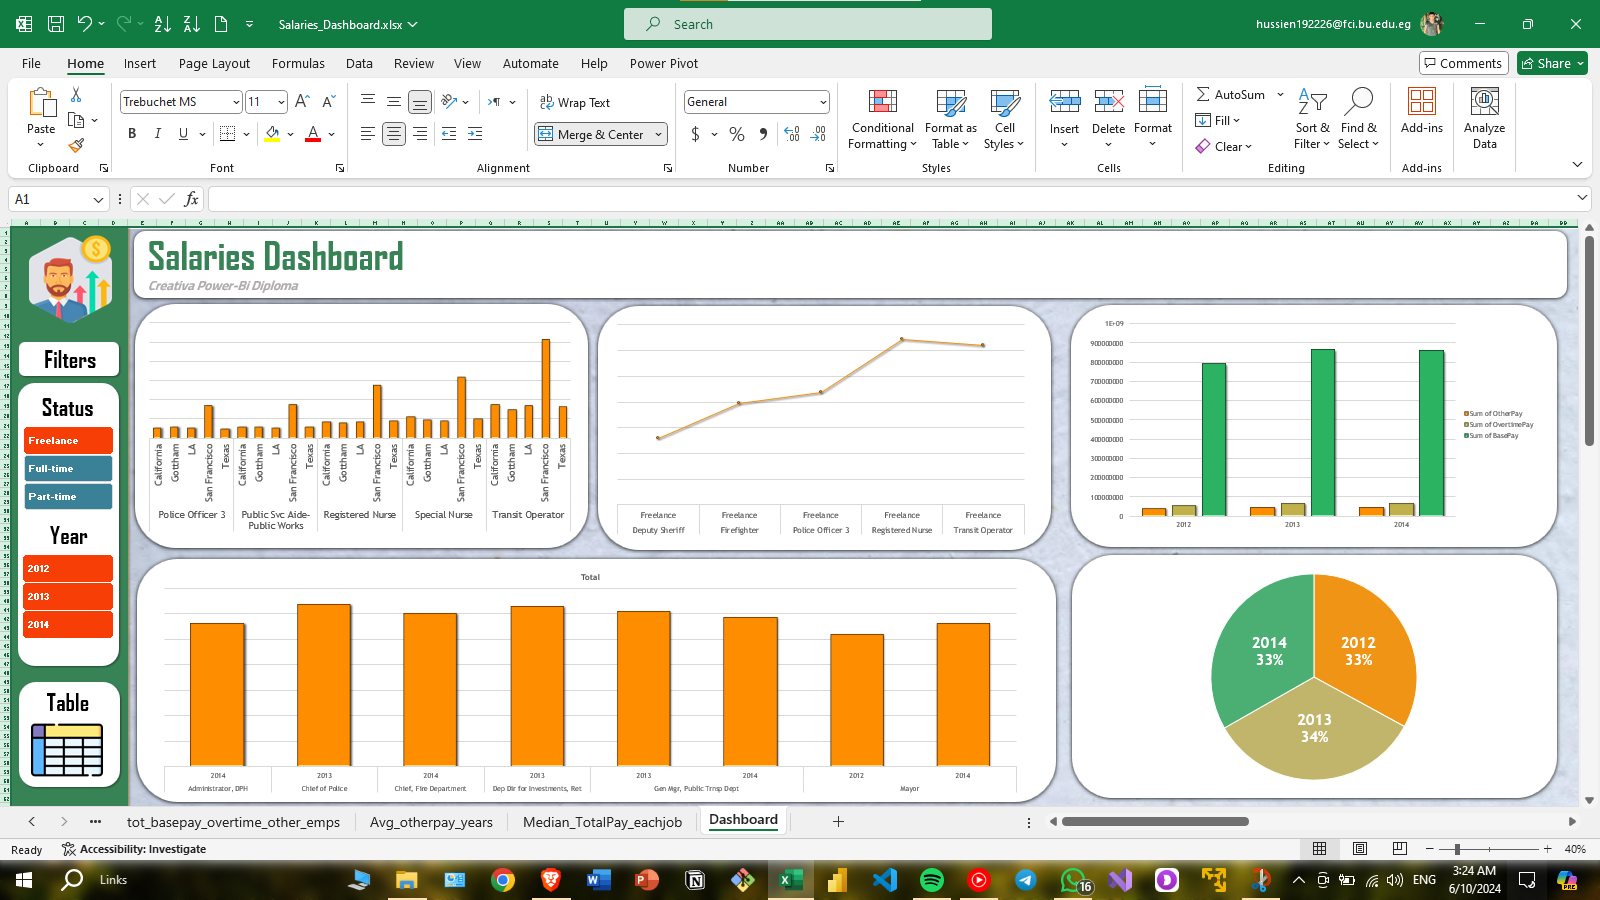

## POWER-BI DASHBOARD

### Salaries Dashboard

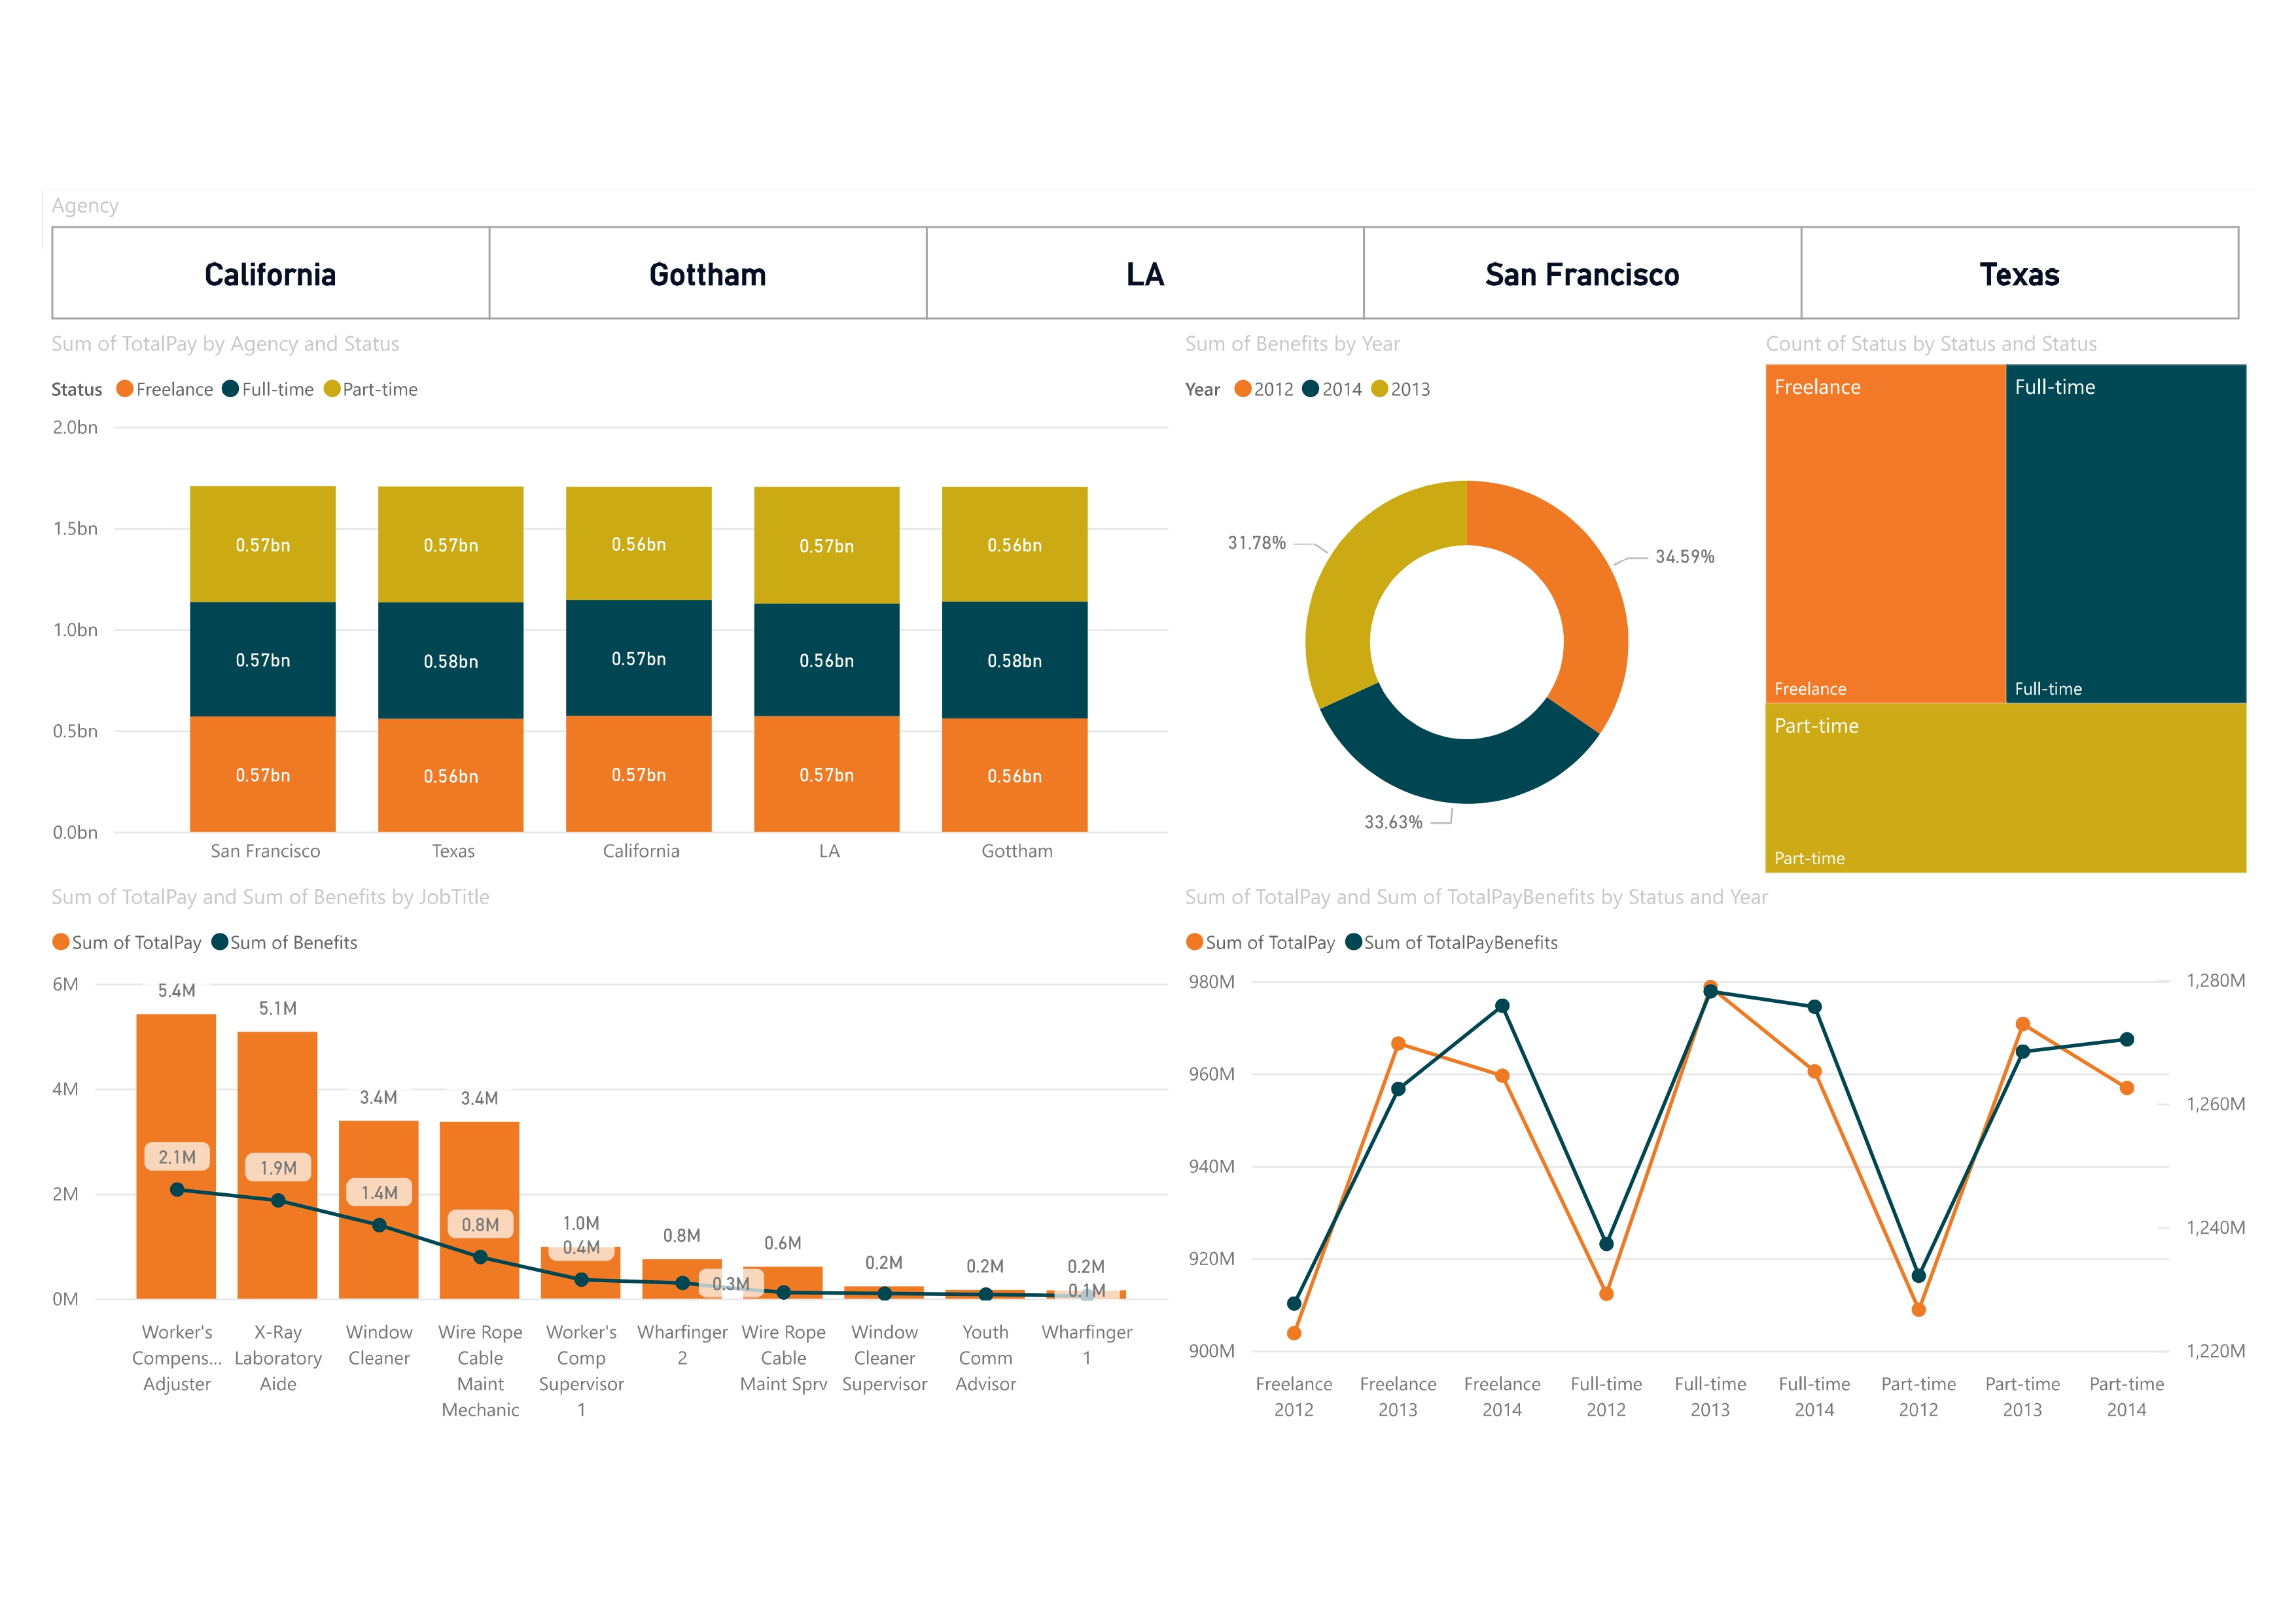